### **Reading Combined Flights 2018 File**

In [1]:
import pandas as pd

file_path = r"C:\Users\Hites\OneDrive\Desktop\CDAC 2024\Project\Dataset\Combined_Flights_2018.csv"

df = pd.read_csv(file_path)

print(df.head())
print(df.info())

   FlightDate            Airline Origin Dest  Cancelled  Diverted  CRSDepTime  \
0  2018-01-23  Endeavor Air Inc.    ABY  ATL      False     False        1202   
1  2018-01-24  Endeavor Air Inc.    ABY  ATL      False     False        1202   
2  2018-01-25  Endeavor Air Inc.    ABY  ATL      False     False        1202   
3  2018-01-26  Endeavor Air Inc.    ABY  ATL      False     False        1202   
4  2018-01-27  Endeavor Air Inc.    ABY  ATL      False     False        1400   

   DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  WheelsOn  TaxiIn  \
0   1157.0              0.0      -5.0  ...     1211.0    1249.0     7.0   
1   1157.0              0.0      -5.0  ...     1210.0    1246.0    12.0   
2   1153.0              0.0      -9.0  ...     1211.0    1251.0    11.0   
3   1150.0              0.0     -12.0  ...     1207.0    1242.0    11.0   
4   1355.0              0.0      -5.0  ...     1412.0    1448.0    11.0   

   CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTime

### **Total Rows in 2018 DataSet**

In [2]:
print("Total in 2019 Dataset rows:", len(df))

Total in 2019 Dataset rows: 5689512


### **Null Values in Dataset**

In [3]:
# Find the number of null values in each column
null_values = df.isnull().sum()

# Display the null values count for each column
print(null_values)

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              102893
ArrivalDelayGroups    102893
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         1
Length: 61, dtype: int64


### Show Percentage of Missing Values

In [4]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

DepTime                 1.500656
DepDelayMinutes         1.521660
DepDelay                1.521660
ArrTime                 1.592667
ArrDelayMinutes         1.808468
AirTime                 1.920569
CRSElapsedTime          0.000105
ActualElapsedTime       1.798871
Tail_Number             0.361156
DepDel15                1.521660
DepartureDelayGroups    1.521660
TaxiOut                 1.664361
WheelsOff               1.664185
WheelsOn                1.714541
TaxiIn                  1.714716
ArrDelay                1.808468
ArrDel15                1.808468
ArrivalDelayGroups      1.808468
DivAirportLandings      0.000018
dtype: float64


In [5]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]

print(null_columns)


DepTime                  85380
DepDelayMinutes          86575
DepDelay                 86575
ArrTime                  90615
ArrDelayMinutes         102893
AirTime                 109271
CRSElapsedTime               6
ActualElapsedTime       102347
Tail_Number              20548
DepDel15                 86575
DepartureDelayGroups     86575
TaxiOut                  94694
WheelsOff                94684
WheelsOn                 97549
TaxiIn                   97559
ArrDelay                102893
ArrDel15                102893
ArrivalDelayGroups      102893
DivAirportLandings           1
dtype: int64


### **Classify the Columns According to their data types**

In [6]:
# Identify time-series columns (Date columns)
time_series_cols = [col for col in df.columns if "date" in col.lower()]

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns (excluding numerical and time-series)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Identify boolean columns (True/False)
boolean_cols = [col for col in df.columns if df[col].dropna().isin([True, False]).all()]

# Print results
print("Time-Series Columns:", time_series_cols)
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Boolean Columns:", boolean_cols)

Time-Series Columns: ['FlightDate']
Numerical Columns: ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings']
Categorical Columns: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'IATA_Code_Marketing_Airline', 'Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName', '

## **-: Handling NUll Values :-**

### 1. Drop Columns with Too Many Nulls (If >50%)


In [7]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)

### 2. Handle Missing Values Based on Data Type
🔹 Numerical Columns

Use Mean if no outliers (normal distribution).

Use Median if outliers exist (skewed distribution). 

In [8]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        if df[col].skew() > 1 or df[col].skew() < -1:  # Check for skewness
            df[col].fillna(df[col].median(), inplace=True)  # Use median
        else:
            df[col].fillna(df[col].mean(), inplace=True)  # Use mean

C:\Users\Hites\AppData\Local\Temp\ipykernel_29992\2454565797.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Use mean
C:\Users\Hites\AppData\Local\Temp\ipykernel_29992\2454565797.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


🔹 Categorical Columns

Use Mode (most frequent value).

Use "Unknown" if mode isn't appropriate.

### 🔹 Boolean Columns (Like Cancelled, Diverted, Delayed)
Fill with False (assuming missing means no event occurred).

In [9]:
boolean_cols = ["Cancelled", "Diverted", "DepDel15", "ArrDel15", "Delayed"]

for col in boolean_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(False, inplace=True)

### 🔹 Time-Series Columns (Like FlightDate)
Use Forward & Backward Fill to propagate values.

In [10]:
if "FlightDate" in df.columns:
    df.sort_values(by="FlightDate", inplace=True)
    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)

C:\Users\Hites\AppData\Local\Temp\ipykernel_29992\411833513.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
C:\Users\Hites\AppData\Local\Temp\ipykernel_29992\411833513.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


### 🔹 3. Drop Remaining Rows (if very few nulls left)

In [11]:
df.dropna(inplace=True)

### 🔹 Final Check For Null Vlaues

In [12]:
print("Missing Values After Handling:")
print(df.isnull().sum())

Missing Values After Handling:
FlightDate            0
Airline               0
Origin                0
Dest                  0
Cancelled             0
                     ..
ArrDel15              0
ArrivalDelayGroups    0
ArrTimeBlk            0
DistanceGroup         0
DivAirportLandings    0
Length: 61, dtype: int64


In [13]:
from IPython.display import display

display(df)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
247140,2018-01-01,SkyWest Airlines Inc.,LAX,ABQ,False,False,944,934.0,0.0,-10.0,...,956.0,1225.0,4.0,1243,-14.0,0.0,-1.0,1200-1259,3,0.0
222813,2018-01-01,Delta Air Lines Inc.,CHO,ATL,False,False,610,559.0,0.0,-11.0,...,621.0,739.0,7.0,752,-6.0,0.0,-1.0,0700-0759,2,0.0
222812,2018-01-01,Delta Air Lines Inc.,DTW,LAX,False,False,820,818.0,0.0,-2.0,...,856.0,1020.0,16.0,1035,1.0,0.0,0.0,1000-1059,8,0.0
222811,2018-01-01,Delta Air Lines Inc.,FLL,DTW,False,False,1805,1759.0,0.0,-6.0,...,1812.0,2042.0,10.0,2112,-20.0,0.0,-2.0,2100-2159,5,0.0
222810,2018-01-01,Delta Air Lines Inc.,LGA,FLL,False,False,1930,1922.0,0.0,-8.0,...,1937.0,2218.0,5.0,2250,-27.0,0.0,-2.0,2200-2259,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967237,2018-12-31,Southwest Airlines Co.,ALB,TPA,False,False,620,617.0,0.0,-3.0,...,624.0,914.0,7.0,940,-19.0,0.0,-2.0,0900-0959,5,0.0
1967238,2018-12-31,Southwest Airlines Co.,AMA,DAL,False,False,1820,1827.0,7.0,7.0,...,1836.0,1927.0,12.0,1925,14.0,0.0,0.0,1900-1959,2,0.0
1967239,2018-12-31,Southwest Airlines Co.,AMA,DAL,False,False,1505,1514.0,9.0,9.0,...,1521.0,1614.0,4.0,1615,3.0,0.0,0.0,1600-1659,2,0.0
1967230,2018-12-31,Southwest Airlines Co.,ALB,BWI,False,False,1455,1505.0,10.0,10.0,...,1511.0,1608.0,3.0,1615,-4.0,0.0,-1.0,1600-1659,2,0.0


### Statistical summary of the DataFrame:
### Descriptive Analysis

In [14]:
df.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,...,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06,5.689512e+06
mean,1.330341e+03,1.334473e+03,1.325717e+01,9.964012e+00,1.462641e+03,1.343616e+01,1.098226e+02,1.389089e+02,1.341240e+02,7.878012e+02,...,1.698988e+01,1.357922e+03,1.458453e+03,7.341002e+00,1.482252e+03,5.209835e+00,1.912892e-01,-1.787610e-01,3.625993e+00,3.568496e-03
std,4.913570e+02,5.010539e+02,4.389745e+01,4.504702e+01,5.362583e+02,4.366663e+01,6.995323e+01,7.288404e+01,7.196568e+01,5.943094e+02,...,9.728388e+00,5.021033e+02,5.319307e+02,5.844953e+00,5.212881e+02,4.705414e+01,3.933162e-01,2.331986e+00,2.342451e+00,1.112816e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+03,1.000000e+00,0.000000e+00,-1.244000e+03,-9.900000e+01,-1.228000e+03,1.600000e+01,...,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.290000e+03,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.150000e+02,9.210000e+02,0.000000e+00,-6.000000e+00,1.050000e+03,0.000000e+00,5.900000e+01,8.600000e+01,8.200000e+01,3.490000e+02,...,1.100000e+01,9.360000e+02,1.046000e+03,4.000000e+00,1.058000e+03,-1.400000e+01,0.000000e+00,-1.000000e+00,2.000000e+00,0.000000e+00
50%,1.323000e+03,1.334473e+03,0.000000e+00,-2.000000e+00,1.462641e+03,0.000000e+00,9.200000e+01,1.200000e+02,1.170000e+02,6.280000e+02,...,1.400000e+01,1.350000e+03,1.458453e+03,6.000000e+00,1.512000e+03,-6.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.735000e+03,1.741000e+03,7.000000e+00,7.000000e+00,1.911000e+03,8.000000e+00,1.380000e+02,1.700000e+02,1.640000e+02,1.024000e+03,...,2.000000e+01,1.756000e+03,1.906000e+03,9.000000e+00,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,2.625000e+03,2.625000e+03,2.400000e+03,2.635000e+03,6.960000e+02,1.645000e+03,7.570000e+02,4.983000e+03,...,1.394000e+03,2.400000e+03,2.400000e+03,2.590000e+02,2.400000e+03,2.635000e+03,1.000000e+00,1.200000e+01,1.100000e+01,9.000000e+00


### Categorical Columns Analysis

In [15]:
print("\nCategorical columns analysis:")
print(df.select_dtypes(include=['object']).nunique())

## It is good to do One_hot_encoding  with this catagorical columns


Categorical columns analysis:
FlightDate                                  365
Airline                                      28
Origin                                      370
Dest                                        370
Marketing_Airline_Network                    11
Operated_or_Branded_Code_Share_Partners      16
IATA_Code_Marketing_Airline                  11
Operating_Airline                            28
IATA_Code_Operating_Airline                  28
Tail_Number                                6093
OriginCityName                              364
OriginState                                  52
OriginStateName                              52
DestCityName                                364
DestState                                    52
DestStateName                                52
DepTimeBlk                                   19
ArrTimeBlk                                   19
dtype: int64


## Bar plot for delayed vs non-delayed flights


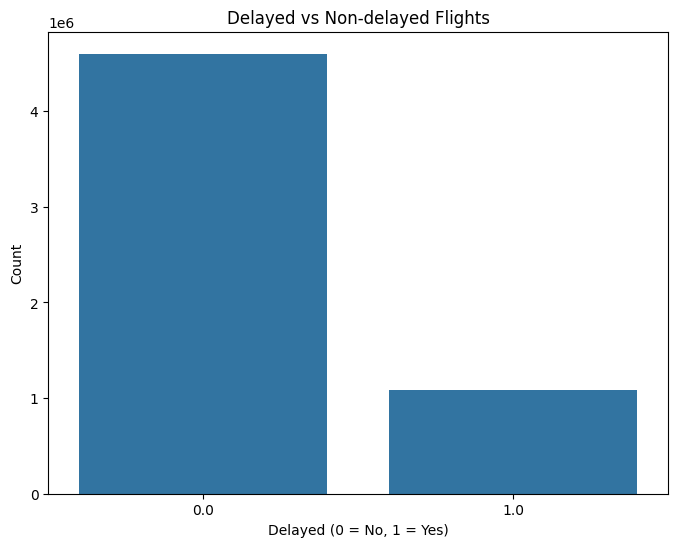

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='ArrDel15', data=df)
plt.title('Delayed vs Non-delayed Flights')
plt.xlabel('Delayed (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## **Calculate Total Flights and Delayed Flights in Year**


In [17]:
df_yearly = df.groupby('Year').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per year
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per year
).reset_index()

# Step 2: Calculate Delayed Percentage per Year
df_yearly['delayed_percentage'] = (df_yearly['delayed_flights'] / df_yearly['total_flights']) * 100

# Step 3: Display the results
print(df_yearly)


   Year  total_flights  delayed_flights  delayed_percentage
0  2018        5689512          1088342           19.128917


## Delayed percentage per month

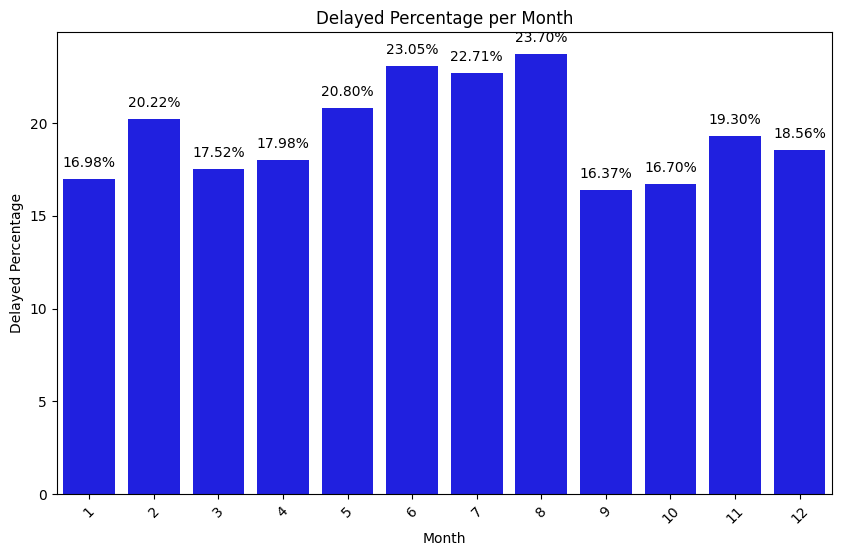

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Month
df_monthly = df.groupby('Month').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per month
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per month
).reset_index()

# Step 2: Calculate Delayed Percentage per Month
df_monthly['delayed_percentage'] = (df_monthly['delayed_flights'] / df_monthly['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='delayed_percentage', data=df_monthly, color='blue')  # Single solid color

# Add data labels
for index, row in df_monthly.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Month")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Month")
plt.xticks(rotation=45)
plt.show()


## Total Flights and Delayed Flights Per Day of the Week

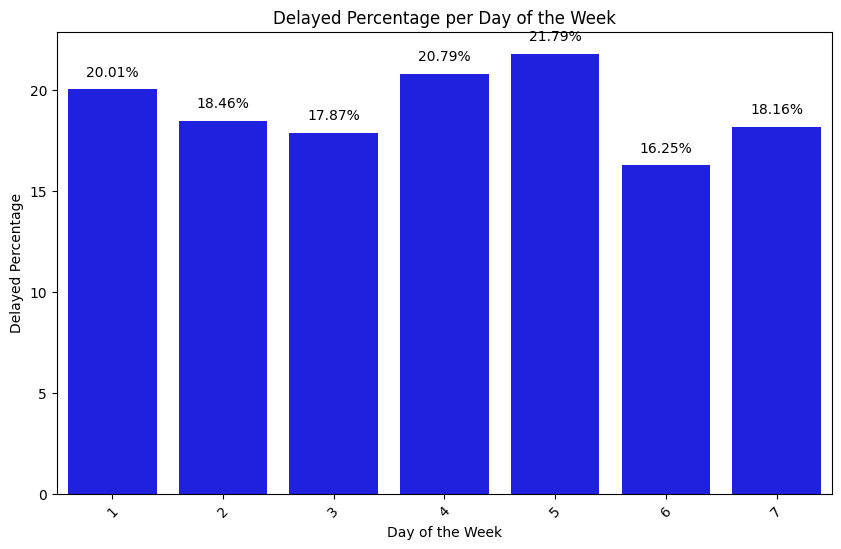

In [19]:
# Step 1: Calculate Total Flights and Delayed Flights Per Day of the Week
df_weekday = df.groupby('DayOfWeek').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per day of the week
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per day of the week
).reset_index()

# Step 2: Calculate Delayed Percentage per Day of the Week
df_weekday['delayed_percentage'] = (df_weekday['delayed_flights'] / df_weekday['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='delayed_percentage', data=df_weekday, color='blue')  # Single solid color

# Add data labels
for index, row in df_weekday.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Day of the Week")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Day of the Week")
plt.xticks(rotation=45)
plt.show()


## **Airline-Wise Flight Delay Analysis**

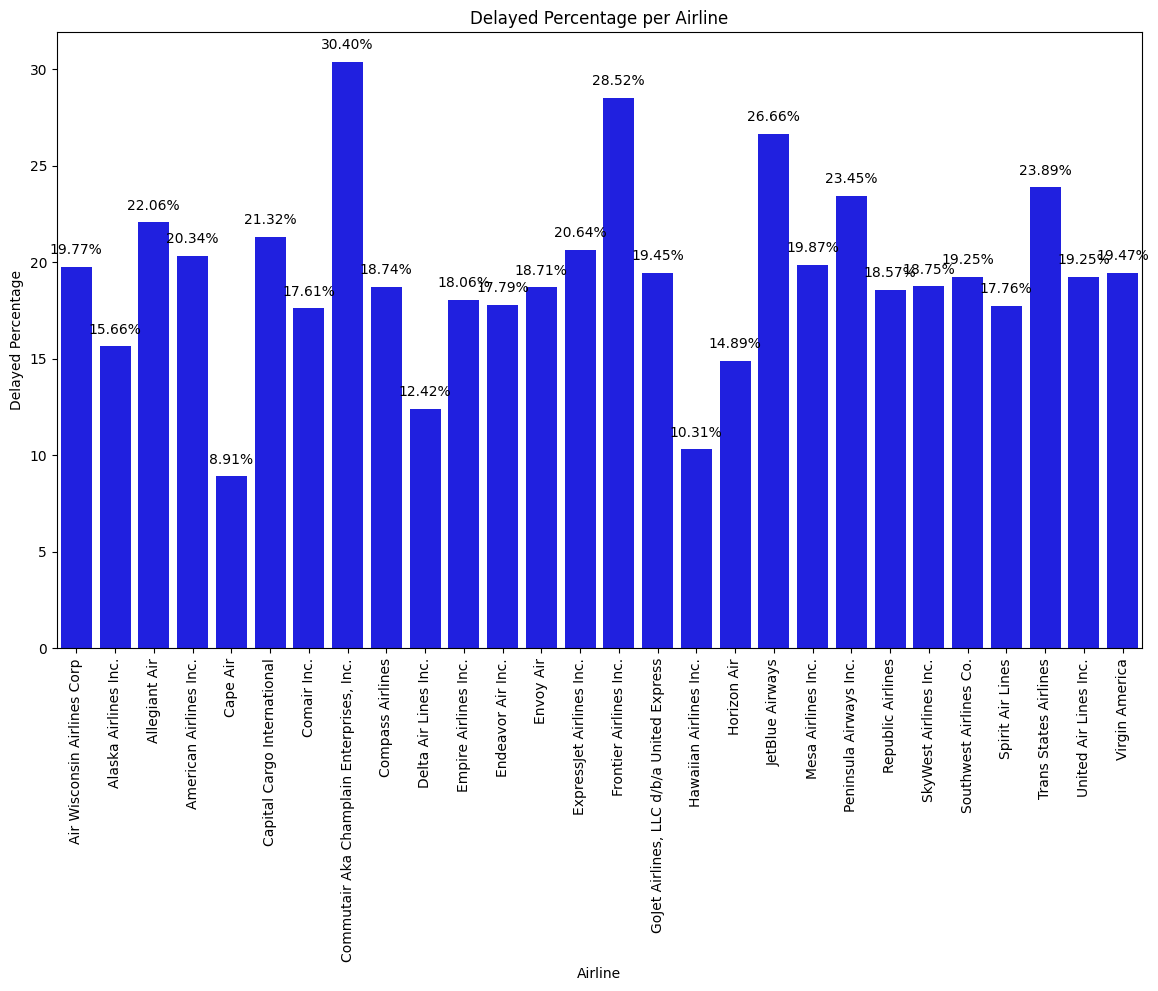

In [20]:
# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(14, 8))
sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, color='blue')  # Single solid color

# Add data labels
for index, row in df_airline.iterrows():
    plt.text(row.name, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Airline-Wise Delay Analysis with Total and Delayed Flights**

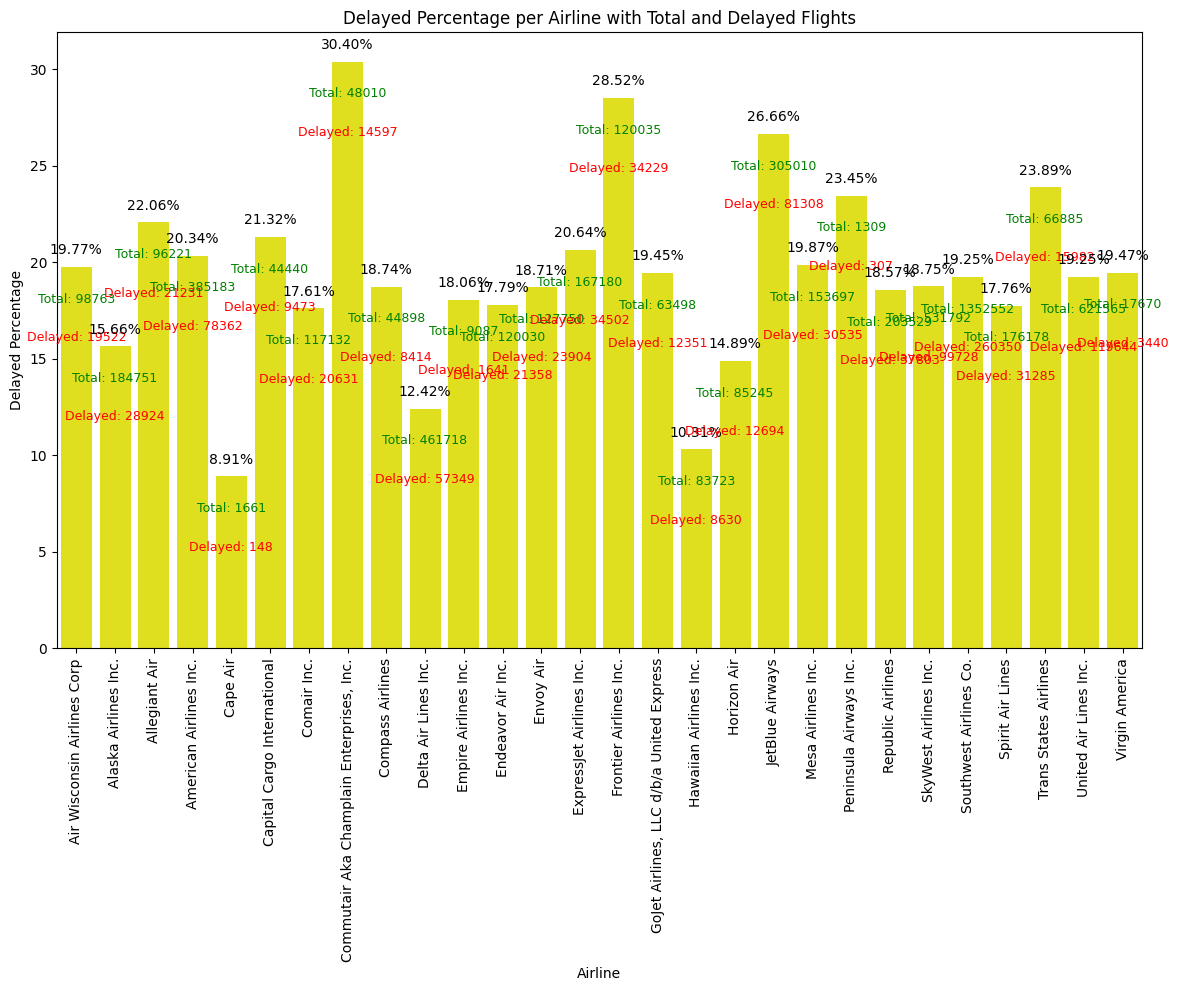

In [21]:
# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(14, 8))
sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, color='yellow')  # Single solid color

# Add data labels for Delayed Percentage, Total Flights, and Delayed Flights
for index, row in df_airline.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size
    
    # Display total flights and delayed flights next to the bars
    plt.text(index, row['delayed_percentage'] - 2,  # Position for total flights label (adjust position to fit)
             f'Total: {row["total_flights"]}',  # Display total flights
             ha='center', va='bottom', fontsize=9, color='green')  # Color for total flights
    
    plt.text(index, row['delayed_percentage'] - 4,  # Position for delayed flights label (adjust position to fit)
             f'Delayed: {row["delayed_flights"]}',  # Display delayed flights
             ha='center', va='bottom', fontsize=9, color='red')  # Color for delayed flights

plt.xlabel("Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Airline with Total and Delayed Flights")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Origin Airport-Wise Delay Analysis: Identifying Airports with Highest Delays**

In [22]:
# Step 1: Calculate Total Flights and Delayed Flights Per Origin
df_origin = df.groupby('Origin').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per origin
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per origin
).reset_index()

# Step 2: Calculate Delayed Percentage per Origin
df_origin['delayed_percentage'] = (df_origin['delayed_flights'] / df_origin['total_flights']) * 100

# Display all rows in tabular form sorted by delayed_percentage in descending order
pd.set_option('display.max_rows', None)  # Show all rows
df_origin_display = df_origin[['Origin', 'total_flights', 'delayed_flights', 'delayed_percentage']].sort_values(by='delayed_percentage', ascending=False)

print(df_origin_display)


    Origin  total_flights  delayed_flights  delayed_percentage
368    YNG              2                1           50.000000
314    SCK            747              287           38.420348
13     AKN             31               11           35.483871
39     BKG             71               24           33.802817
151    HGR            138               46           33.333333
257    OTH            371              123           33.153639
276    PPG            122               40           32.786885
350    TTN           2603              825           31.694199
259    OWB            111               34           30.630631
277    PQI            313               95           30.351438
247    OGD            126               38           30.158730
256    ORH           1137              325           28.583993
41     BLV           1019              287           28.164868
5      ACK            998              280           28.056112
343    SWF           1895              531           28

## **List of Distinct Operating Airlines in the Dataset**

In [23]:
# Find distinct operating airlines
distinct_airlines = df['Operating_Airline'].unique()

# Print the distinct operating airlines
print(distinct_airlines)

['OO' 'DL' 'YX' 'CP' 'G7' '9E' 'NK' 'EV' 'UA' 'AS' 'HA' 'EM' 'YV' 'QX'
 'ZW' 'B6' '9K' 'VX' 'C5' 'AX' 'WN' 'G4' 'F9' 'KS' 'MQ' 'AA' 'OH' 'PT']


## **Delayed Percentage per Operating Airline**

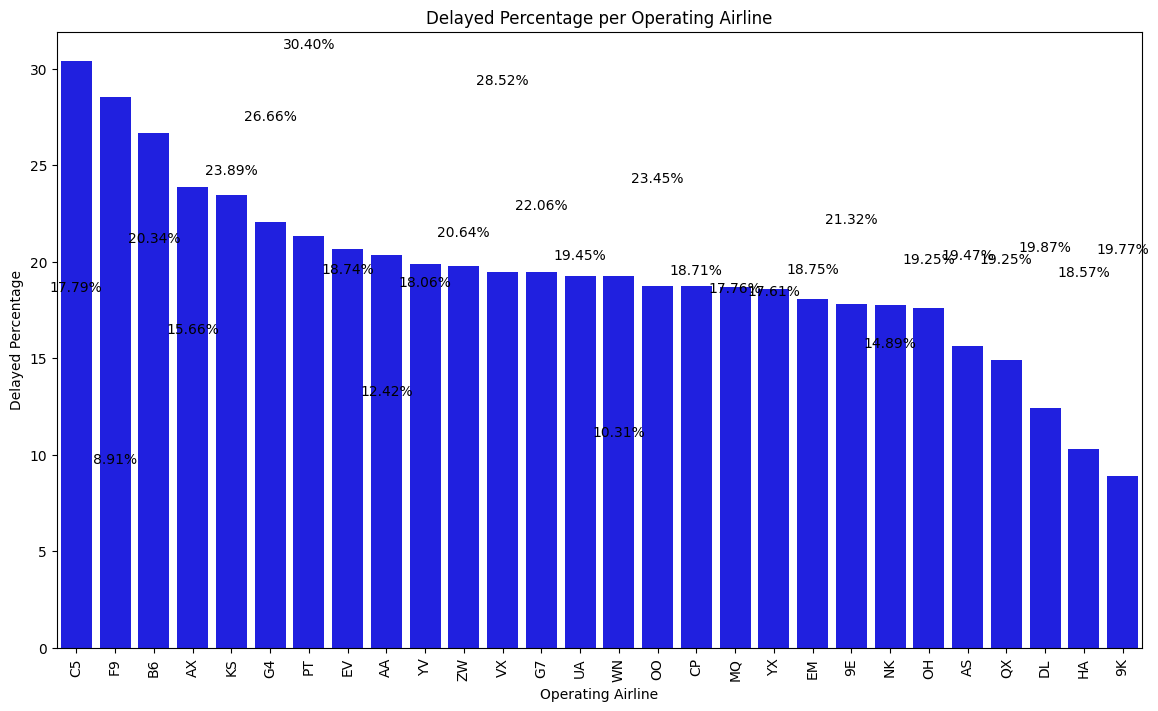

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Operating Airline
df_operating_airline = df.groupby('Operating_Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per operating airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per operating airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Operating Airline
df_operating_airline['delayed_percentage'] = (df_operating_airline['delayed_flights'] / df_operating_airline['total_flights']) * 100

# Step 3: Sort the values by delayed percentage
df_operating_airline = df_operating_airline.sort_values(by='delayed_percentage', ascending=False)

# Step 4: Create a Bar Plot with Delayed Percentage
plt.figure(figsize=(14, 8))
sns.barplot(x='Operating_Airline', y='delayed_percentage', data=df_operating_airline, color='blue')  # Solid color

# Add data labels for Delayed Percentage
for index, row in df_operating_airline.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Operating Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Operating Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Flight Delay Analysis by Distance Group**

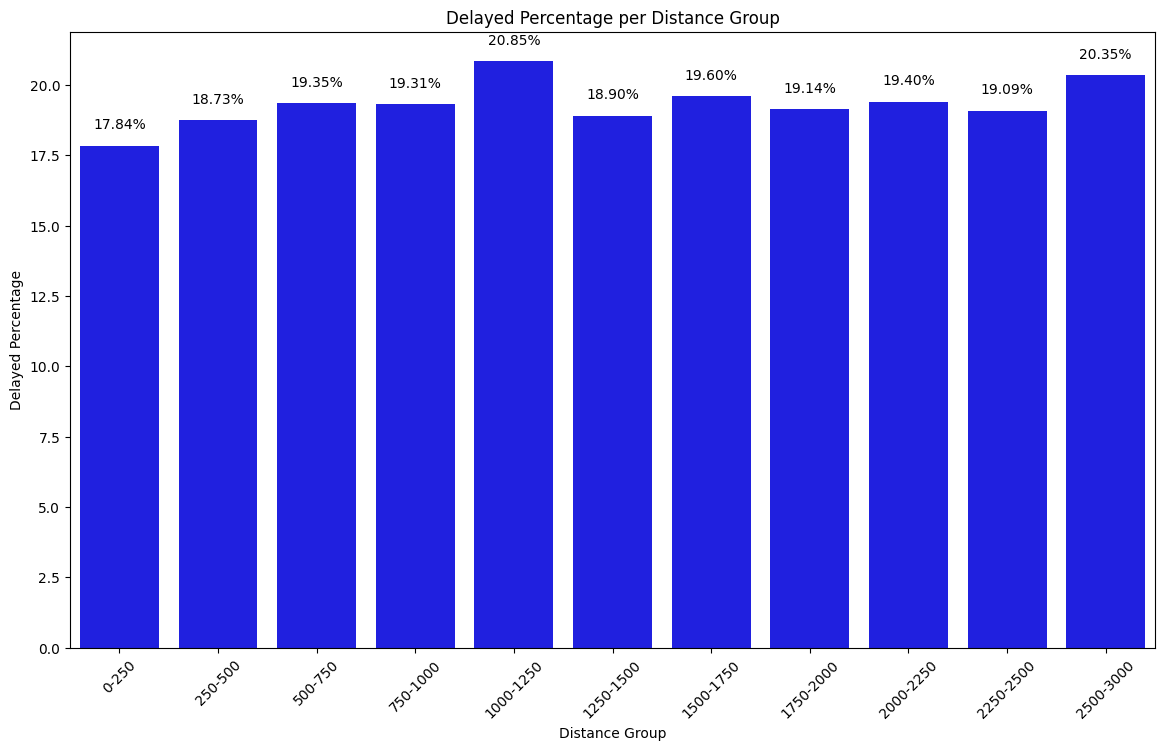

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Calculate Total Flights and Delayed Flights Per Distance Group
df_distance_group = df.groupby('DistanceGroup').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per distance group
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per distance group
).reset_index()

# Step 2: Calculate Delayed Percentage per Distance Group
df_distance_group['delayed_percentage'] = (df_distance_group['delayed_flights'] / df_distance_group['total_flights']) * 100

# Step 3: Map numerical distance groups to actual range labels
distance_ranges = {
    1: '0-250',
    2: '250-500',
    3: '500-750',
    4: '750-1000',
    5: '1000-1250',
    6: '1250-1500',
    7: '1500-1750',
    8: '1750-2000',
    9: '2000-2250',
    10: '2250-2500',
    11: '2500-3000'
}

df_distance_group['DistanceRange'] = df_distance_group['DistanceGroup'].map(distance_ranges)

# Step 4: Sort the values by delayed percentage
df_distance_group = df_distance_group.sort_values(by='delayed_percentage', ascending=False)

# Step 5: Convert 'DistanceRange' to a categorical column with correct order
df_distance_group['DistanceRange'] = pd.Categorical(df_distance_group['DistanceRange'], 
                                                     categories=distance_ranges.values(), 
                                                     ordered=True)

# Step 6: Create a Bar Plot with Delayed Percentage using the actual distance range labels
plt.figure(figsize=(14, 8))
sns.barplot(x='DistanceRange', y='delayed_percentage', data=df_distance_group, color='blue')  # Solid color

# Add data labels for Delayed Percentage
for index, row in df_distance_group.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

# Labeling axes and title
plt.xlabel("Distance Group")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Distance Group")
plt.xticks(rotation=45)  # Rotate distance group labels for better readability
plt.show()


## **Displays the Top 10 destination cities with the highest delay percentages**

In [26]:
# Group by destination and count the number of delayed flights
delayed_by_dest = df.groupby('DestCityName')['ArrDel15'].sum().reset_index()

# Count total flights per destination
total_flights_by_dest = df.groupby('DestCityName')['ArrDel15'].count().reset_index()

# Merge both dataframes
delayed_by_dest = delayed_by_dest.merge(total_flights_by_dest, on='DestCityName', suffixes=('_delayed', '_total'))

# Calculate percentage of delayed flights
delayed_by_dest['Delay_Percentage'] = (delayed_by_dest['ArrDel15_delayed'] / delayed_by_dest['ArrDel15_total']) * 100

# Sort the cities by percentage of delayed flights
delayed_by_dest_sorted = delayed_by_dest.sort_values(by='Delay_Percentage', ascending=False)

# Print the top 10 cities with the highest percentage of delayed flights
print(delayed_by_dest_sorted[['DestCityName', 'Delay_Percentage']].head(10))


                 DestCityName  Delay_Percentage
362     Youngstown/Warren, OH        100.000000
267  Presque Isle/Houlton, ME         35.031847
42                Branson, MO         33.802817
238   North Bend/Coos Bay, OR         33.423181
340              Unalaska, AK         33.027523
262                 Ponce, PR         31.060606
232                Newark, NJ         30.447627
3               Aguadilla, PR         30.381679
300               Sanford, FL         29.739583
132      Hancock/Houghton, MI         29.258242


 ## **Correlation of Features with Departure Delay (DepDelayMinutes and ArrDelayMinutes)**

                      DepDelayMinutes  ArrDelayMinutes
DepDelayMinutes              1.000000         0.970253
DepDelay                     0.996558         0.965761
ArrDelayMinutes              0.970253         1.000000
ArrDelay                     0.951054         0.981802
DepartureDelayGroups         0.852483         0.815567
ArrivalDelayGroups           0.796205         0.833863
DepDel15                     0.577425         0.531509
ArrDel15                     0.524952         0.572582
DepTime                      0.131559         0.117813
WheelsOff                    0.121716         0.112078


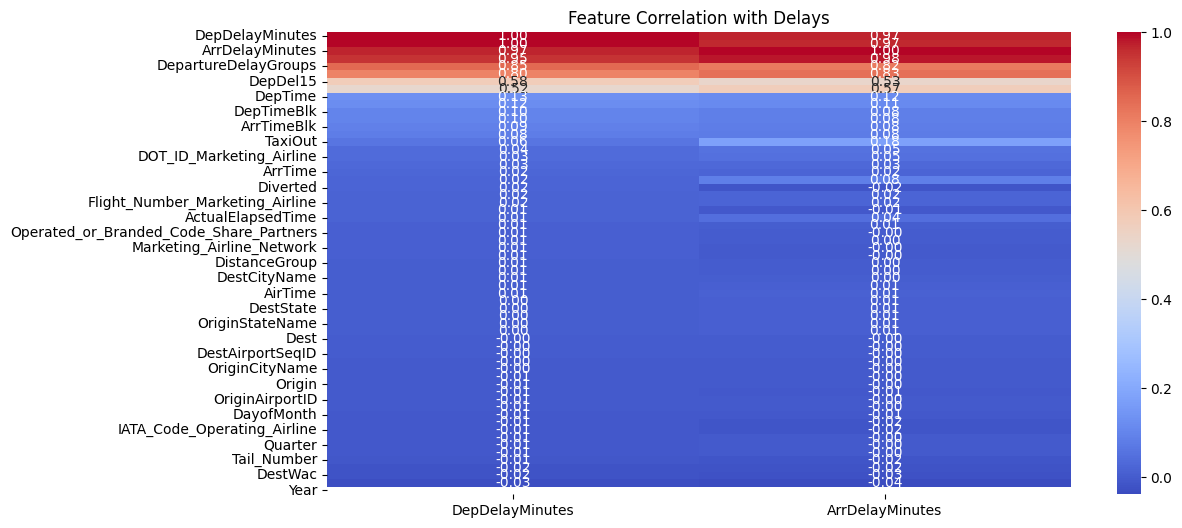

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Selecting numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encoding categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlations of delay columns (Using Correct Columns)
delay_correlations = correlation_matrix[['DepDelayMinutes', 'ArrDelayMinutes']].sort_values(
    by=['DepDelayMinutes', 'ArrDelayMinutes'], ascending=False
)

# Display top correlated features
print(delay_correlations.head(10))

# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(delay_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Delays")
plt.show()


## **Correlation of Features with Flight Delay Status (ArrDel15)**

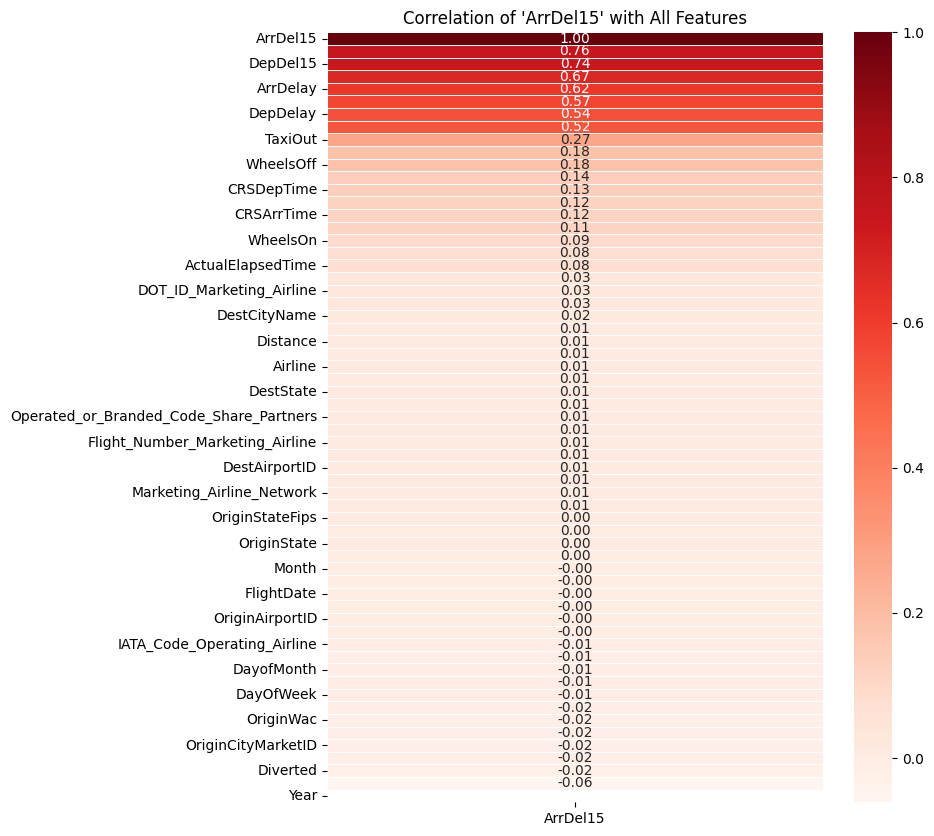

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Identify categorical and numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Compute correlation of 'ArrDel15' with all columns
delayed_correlation = df.corr()[["ArrDel15"]].sort_values(by="ArrDel15", ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(delayed_correlation, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)

plt.title("Correlation of 'ArrDel15' with All Features")
plt.show()

